In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import statistics

from konlpy.tag import Twitter
from konlpy.utils import pprint
twitter = Twitter()
from collections import Counter

pd.set_option('max_colwidth', 500)

In [3]:
from konlpy.tag import Komoran
komoran=Komoran()

In [4]:
 # 소수점 아래 3자리까지 나타내기, 4째자리에서 반올림
def short_float(val):
    value = float("{:.4f}".format(val))
    return value


In [5]:
def print_want_val(sm_list,used_func):
    val=(used_func(sm_list))
    val=short_float(val)
    
    return val

In [6]:
# 1. komoranlass
def make_token_review_komoran(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_komoran_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [7]:
# 1. kkma class
def make_token_review_kkma(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_kkma_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [8]:
# 1. token_review dataframe에 추가
def make_token_review(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['cId','_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_twitter_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [9]:
# 2. calculate similarity
def make_similarity(df):
    TaggedDocument = namedtuple('TaggedDocument', 'words tags')
    tagged_train_docs = [TaggedDocument(d, c) for d, c in df[['token_review', 'label']].values]
    
    model= Doc2Vec(
    dm=0,            # PV-DBOW / default 1
    dbow_words=1,    # w2v simultaneous with DBOW d2v / default 0
    window=8,        # distance between the predicted word and context words
    size=300,        # vector size
    alpha=0.025,     # learning-rate
    seed=1234,
    min_count=0,    # ignore with freq lower
    min_alpha=0.025, # min learning-rate

    hs = 1,          # hierarchical softmax / default 0
    negative = 10,   # negative sampling / default 5
    )
    
    model.build_vocab(tagged_train_docs, update=False)
    print("model name: ", str(model))
    
    start = time()
    for epoch in range(10):
        model.train(tagged_train_docs, total_examples=model.corpus_count, epochs=model.iter)
        model.alpha -= 0.002 # decrease the learning rate
        model.min_alpha = model.alpha # fix the learning rate, no decay
    end = time()
    print("During Time: {}".format(end-start))
    
    
    sm=[]
    for i in range(len(df)-1):
        for j in range(i+1, len(df)):
            val=model.wv.n_similarity(df['token_review'][i],df['token_review'][j])
         #   print str(i+1) + str('번째 리뷰와') + str(j+1) + str('번째 리뷰 유사도: ')+ str(val)
            sm.append(val)
        
    print str('최대값: ') + str(max(sm))
    print str('상위25%: ') + str(np.percentile(sm,75))
    print str('중간값: ') + str(np.percentile(sm,50))
    print str('상위75%: ') + str(np.percentile(sm,25))
    print str('평균: ') + str(np.mean(sm))
    
    return sm

In [11]:
import pandas as pd
import numpy as np
np.random.seed(0)
from konlpy.tag import Twitter
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

twitter=Twitter()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
from konlpy.tag import Kkma
kkma=Kkma()

In [13]:
from gensim.models import Doc2Vec
import sys
import multiprocessing
from time import time
from collections import namedtuple

In [15]:
from nltk.tokenize import word_tokenize
import nltk

In [20]:
go_cid=list(go_cid)

In [21]:
go_cid=go_cid[1:]
len(go_cid) # review 1개 작성자, 네이버페이구매자 제외

92802

In [27]:
def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)
def tokenizer_twitter_nouns(doc):
    return twitter.nouns(doc)
def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)

In [28]:
def tokenizer_kkma_morphs(doc):
    return kkma.morphs(doc)
def tokenizer_kkma_nouns(doc):
    return kkma.nouns(doc)
def tokenizer_kkma_pos(doc):
    return kkma.pos(doc)

In [29]:
def tokenizer_komoran_morphs(doc):
    return komoran.morphs(doc)

In [30]:
df['token_review']=df['desc'].apply(tokenizer_twitter_morphs)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
import random

In [515]:
test_cid=random.sample(go_cid,1000)

In [516]:
len(test_cid)

1000

In [517]:
test_cid[:10]

[u'userna**',
 u'duddnd00**',
 u'eunyoun**',
 u'syl03**',
 u'57687026**',
 u'zhfldk43**',
 u'bj12**',
 u'ysyoung01**',
 u'500899323422769**',
 u'ssllc**']

1천명

In [518]:
len(test_cid)

1000

In [ ]:
max_list=[]
mid_list=[]
q1_list=[]
q3_list=[]

for i in range(len(test_cid)):
    print str(i+1) + str('번째 리뷰어: ')+ str(test_cid[i].encode('utf-8'))
    re=make_token_review(test_cid[i])
    
    sm=make_similarity(re)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    max_list.append(result_max)
       
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)         
    q3_list.append(result_q3)
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
    mid_list.append(result_mid)
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
    q1_list.append(result_q1)
   

    print("\n")

In [520]:
test_df=pd.DataFrame(columns=['cId','_max', 'q3','mid', 'q1'])
test_df

,cId,_max,q3,mid,q1


In [521]:
test_df['cId']=test_cid
test_df['_max']=max_list
test_df['q3']=q3_list
test_df['mid']=mid_list
test_df['q1']=q1_list

In [523]:
test_df._max.describe()

count    1000.000000
mean        0.894901
std         0.118538
min        -0.050800
25%         0.825050
50%         0.931900
75%         0.996625
max         1.000000
Name: _max, dtype: float64

In [524]:
test_df.q3.describe()

count    1000.000000
mean        0.811161
std         0.158637
min        -0.050800
25%         0.666925
50%         0.810750
75%         0.984800
max         1.000000
Name: q3, dtype: float64

In [525]:
test_df.mid.describe()

count    1000.000000
mean        0.766181
std         0.188299
min        -0.050800
25%         0.595475
50%         0.743250
75%         0.980925
max         1.000000
Name: mid, dtype: float64

In [526]:
test_df.q1.describe()

count    1000.000000
mean        0.723317
std         0.217033
min        -0.050800
25%         0.527075
50%         0.676900
75%         0.975875
max         1.000000
Name: q1, dtype: float64

In [527]:
t_cid=[]
for i in range(len(df)):
    if(test_df['_max'][i]>=0.99 and test_df['q3'][i]>= 0.98 and test_df['mid'][i]>=0.98 and test_df['q1'][i]>=0.97):
        print(test_df['cId'][i])
        t_cid.append(test_df['cId'][i])

bj12**
gusal71**
nsm3**
jes6**
codusd**
qorgprud1**


In [546]:
(go_data.loc[go_data['cId']=='hj44**'])[['desc','rDate','rNo','rScore','pID']]

,desc,rDate,rNo,rScore,pID
336566,딱 이옷이 나왔을때 보자마자 아 남자친구랑 커플티로 해도 이쁘겠다 해서 바로 구매 했던거 같아요 주문 폭주일까봐 걱정하며 얼른 주문시켰던게 기억이 나네요 ㅎㅎ 남자친구한테 주니깐 이쁘다며 좋아하고 같이 입고 롯데월드 데이트 하구왔어요^^ 이쁘게 잘입었어요~~고맙습니다 다들 추천해요 튀지도 않고 딱 이쁜 단가라 티!!,2016. 05. 30,450301,5.0,31365
336567,편하게 입고 다닐수 있어서 좋아요 ㅎㅎㅎㅎ 사실 하체비만이여서 슬랙스 처럼 되지 않아서 아쉽지만 다이어트 해야겠어요 ㅎㅎㅎㅎ ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 다이어트 화이팅 입니다.ㅜㅜㅜㅜ,2016. 05. 30,450300,5.0,22534
336569,평소에도 편하게 코디하고 다닐수 있어서 좋아효 이쁘고 딱 7부길이!! 고맙습니다.ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 05. 30,450298,5.0,30972
356902,봏아욯ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 04. 17,428930,5.0,31353
364533,완전 편해요 진짜!!!!! ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 04. 01,421145,5.0,30810
365630,ㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ너무 작았어요ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ,2016. 03. 22,414932,5.0,31101
365631,품젛ㄹ렇ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ,2016. 03. 22,414931,5.0,30972


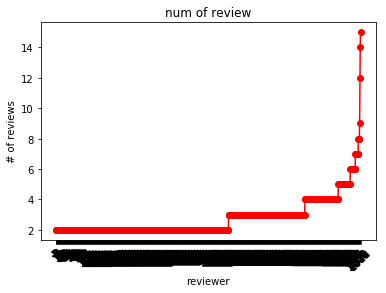

In [583]:
x=np.arange(len(num))
y=sorted(num)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('num of review')
plt.xlabel("reviewer")
plt.ylabel("# of reviews")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()